In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Let’s say we have a fictional dataset of pairs of variables, a mother and her daughter’s heights:  
height of mother(x)/daughter (y) pairs  
Create a CSV file for the above training data and write a Python function program to find the fitted linear  
regression with gradient descent technique. Compare the coefficients obtained from the sklearn model with  
your program. Compute the error, MSE and RMSE. Plot the graph Daughter height (Y-axis) vs Mother height  
(X-axis) with blue colour. Also, plot the line of best fit with red colour. Predict her daughter’s height with  
given a new mother height as 63. Plot the graph of error in y-axis and iteration in x-axis with 4 epochs (6x4=24  
iterations).

In [195]:
"""
Create a CSV file for the above training data
"""

data = """
m_height,d_height
58,60
62,60
60,58
64,60
67,70
70,72
"""

with open('data.csv', 'w') as f:
    f.write(data.strip())

In [196]:
"""
write a Python function program to find the fitted linear
regression with gradient descent technique
"""
import snoop


def sgd(df, learning_rate=0.00004, epochs=4):
    X = df['m_height'].to_numpy()
    y = df['d_height'].to_numpy()
    
    B0 = 0.0
    B1 = 0.0
    errorlist = []
    n = len(X)
    
    for epoch in range(epochs): 
        for i in range(n):
            xi = X[i]
            yi = y[i]
            
            # Make prediction
            pi = B0 + (B1 * xi)
            
            # Calculate error
            error = pi - yi
            errorlist.append(error)

            # Update coefficients
            B0 = B0 - learning_rate * error
            B1 = B1 - learning_rate * error * xi
            
#     print(f'Final B0: {B0}')
#     print(f'Final B1: {B1}')
    return B0, B1, errorlist
df = pd.read_csv('data.csv')
B0, B1, a = sgd(df)
B0, B1

(np.float64(0.015707110813946143), np.float64(0.9887564300065155))

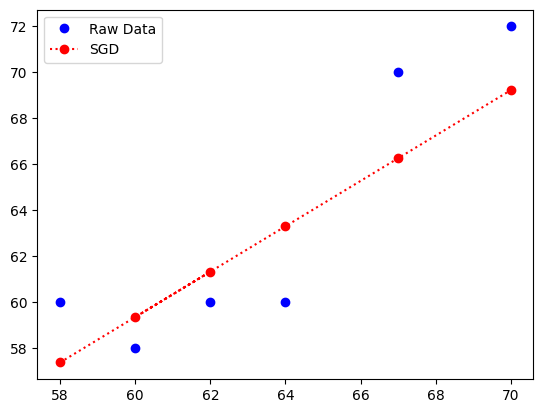

In [197]:
def plot_sgd(df):
    X = df['m_height']
    y = df['d_height']
    B0, B1, a = sgd(df)
    
    y_pred = B0 + (B1 * X)
    fig, ax = plt.subplots()
    ax.plot(X, y, 'bo', label='Raw Data')
    ax.plot(X, y_pred, 'ro:', label='SGD')
    ax.legend()
    plt.show()
    
plot_sgd(df)

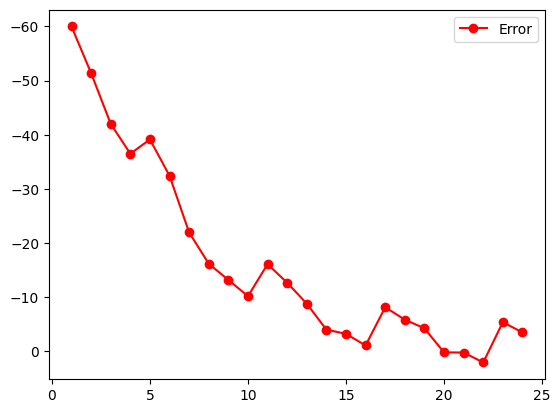

In [198]:
X = [i for i in range(1, 25)]
res = sgd(df)
error = res[2]

fig, ax = plt.subplots()
ax.plot(X, error, 'ro-', label='Error')
ax.invert_yaxis()
ax.legend()
plt.show()


Create a CSV file for the above training data and write a Python function program to find the fitted logistic  
regression with gradient descent technique. Compare the coefficients obtained from the sklearn model with  
your program. Compute the predicted y and assign the class label (prediction = 0 IF p(fail) < 0.5 and prediction  
= 1 IF p(pass) >= 0.5) and compute the accuracy. Find the error for each iteration and predict the probability  
that a student will pass the exam if they study for a) 3.5 hours b) 7.5 hours. Plot the graph of error in y-axis  
and iteration in x-axis with 3 epochs (8x3=24 iterations).

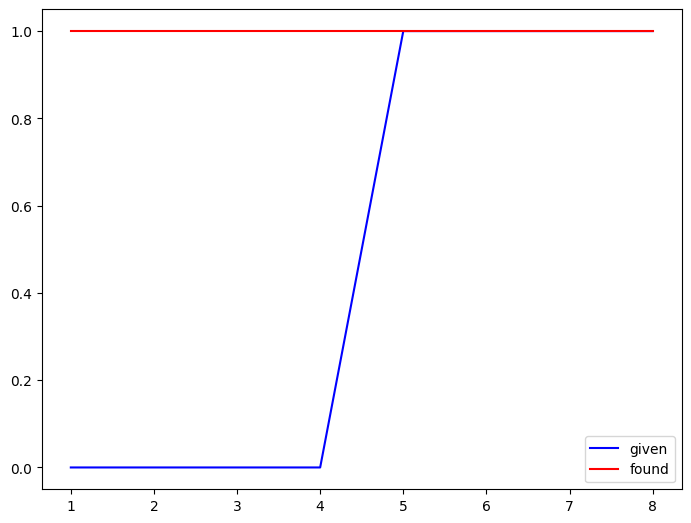

In [199]:
"""
Create a CSV file for the above training data and write a Python function program to find the fitted logistic  
regression with gradient descent technique. Compare the coefficients obtained from the sklearn model with  
your program. Compute the predicted y and assign the class label (prediction = 0 IF p(fail) < 0.5 and prediction  
= 1 IF p(pass) >= 0.5) and compute the accuracy. Find the error for each iteration and predict the probability  
that a student will pass the exam if they study for a) 3.5 hours b) 7.5 hours. Plot the graph of error in y-axis  
and iteration in x-axis with 3 epochs (8x3=24 iterations).
"""

df = pd.read_csv('study.csv')
x = df['hours'].to_numpy()
y = df['pass'].to_numpy()

b0, b1 = 0, 0
a = 0.3
y_len = len(y)

for i in range(3):
    for j in range(y_len):
        z = b0 + (b1 * x[j])
        p = 1 / (1 + np.exp(-1 * z))
        err = (y[j] - p)
        b0 = b0 + (a * err * p * (1 - p))
        b1 = b1 + (a * err * p * (1 - p) * x[j])
        

predict = []
mse = 0
for i in range(y_len):
    z = b0 + (b1 * x[j])
    p = 1 / (1 + np.exp(-1 * z))
    if p >= 0.5:
        p = 1
    else:
        p = 0
    predict.append(p)
    mse += (y[i] - p) ** 2
mse /= y_len
predict = np.array(predict)
fig = plt.figure()
ax = fig.add_axes(rect=(0, 0, 1, 1))
plt.plot(x, y, label = 'given', color = 'blue')
plt.plot(x, predict, label = 'found', color = 'red')
plt.legend()
plt.show()

Model coefficients: b0 = -0.1991005737045524, b1 = 0.3374121036047759
Model accuracy: 0.5
Sklearn coefficients: b0 = -5.264107913297968, b1 = 1.1697993675705605


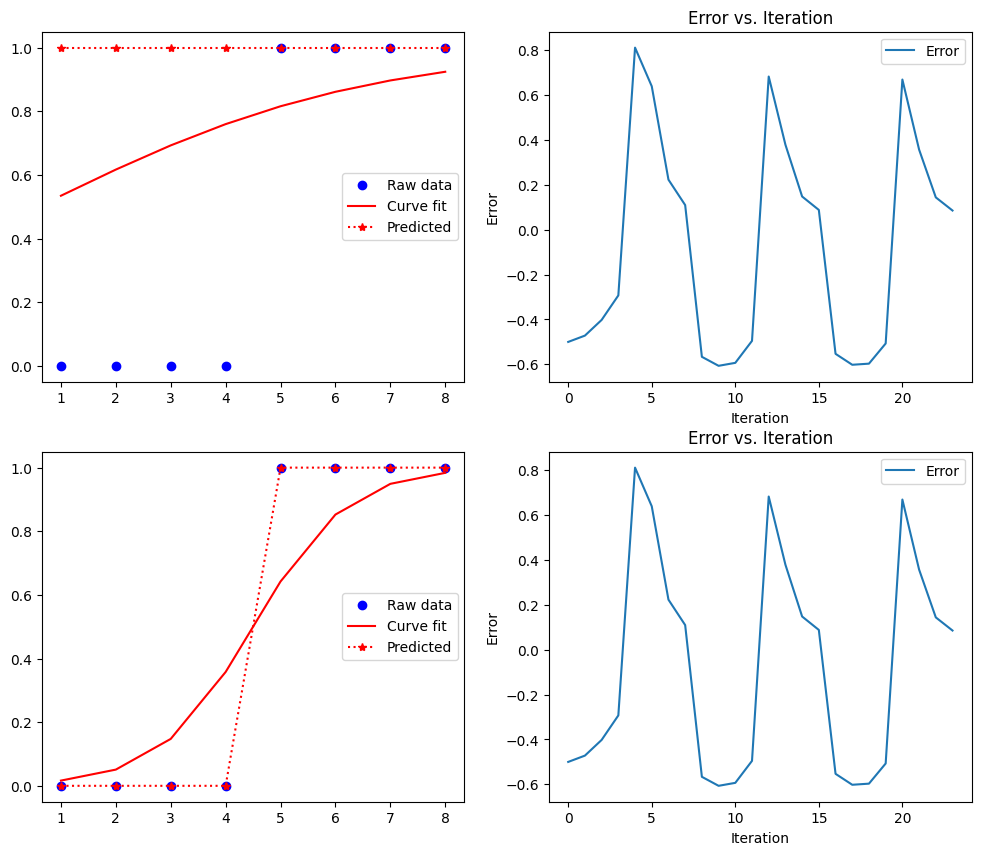

Probability of passing for 3.5 hours of study: 0.23688930646117637
Probability of passing for 7.5 hours of study: 0.9709536906284063


In [248]:
"""
Create a CSV file for the above training data and write a Python function program to find the fitted logistic  
regression with gradient descent technique. Compare the coefficients obtained from the sklearn model with  
your program. Compute the predicted y and assign the class label (prediction = 0 IF p(fail) < 0.5 and prediction  
= 1 IF p(pass) >= 0.5) and compute the accuracy. Find the error for each iteration and predict the probability  
that a student will pass the exam if they study for a) 3.5 hours b) 7.5 hours. Plot the graph of error in y-axis  
and iteration in x-axis with 3 epochs (8x3=24 iterations).
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def logistic_regression_gd(df, learning_rate=0.3, epochs=3):
    x = df['hours'].to_numpy()
    y = df['pass'].to_numpy()

    b0, b1 = 0, 0
    y_len = len(y)
    error_list = []

    for _ in range(epochs):
        for j in range(y_len):
            z = b0 + (b1 * x[j])
            p = 1 / (1 + np.exp(-z))
            error = y[j] - p
            error_list.append(error)
            b0 = b0 + (learning_rate * error * p * (1 - p))
            b1 = b1 + (learning_rate * error * p * (1 - p) * x[j])

    predictions = []
    for j in range(y_len):
        z = b0 + (b1 * x[j])
        p = 1 / (1 + np.exp(-z))
        prediction = 1 if p >= 0.5 else 0
        predictions.append(prediction)

    accuracy = accuracy_score(y, predictions)
    return b0, b1, accuracy, error_list, predictions

# Load data
df = pd.read_csv('study.csv')

X = df['hours'].to_numpy()
y = df['pass'].to_numpy()

# Train model and calculate accuracy
b0, b1, accuracy, error_list, predictions = logistic_regression_gd(df)
print(f"Model coefficients: b0 = {b0}, b1 = {b1}")
print(f"Model accuracy: {accuracy}")

# Plot predictions vs actual
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
ax1.plot(X, y, 'bo', label='Raw data')
ax1.plot(X, 1 / (1 + np.exp(-(b0 + b1 * X))), 'r-', label='Curve fit')
ax1.plot(X, predictions, 'r*:', label='Predicted')
ax1.legend(loc='center right')

# Plot error over iterations
# plt.figure(figsize=(10, 6))
ax2.plot(error_list, label='Error')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Error')
ax2.set_title('Error vs. Iteration')
ax2.legend(loc='upper right')

# Compare with sklearn
X = df['hours'].to_numpy().reshape(-1, 1)
y = df['pass'].to_numpy()
model = LogisticRegression()
model.fit(X, y)
b0 = model.intercept_[0]
b1 = model.coef_[0][0]
print(f"Sklearn coefficients: b0 = {b0}, b1 = {b1}")

ax3.plot(X, y, 'bo', label='Raw data')
ax3.plot(X, 1 / (1 + np.exp(-(b0 + b1 * X))), 'r-', label='Curve fit')
ax3.plot(X, 1 / (1 + np.exp(-(b0 + b1 * X))) >= 0.5, 'r*:', label='Predicted')
ax3.legend(loc='center right')

ax4.plot(error_list, label='Error')
ax4.set_xlabel('Iteration')
ax4.set_ylabel('Error')
ax4.set_title('Error vs. Iteration')
ax4.legend(loc='upper right')
plt.show()

# Predictions for 3.5 and 7.5 hours of study
hours = np.array([3.5, 7.5]).reshape(-1, 1)
predictions = model.predict_proba(hours)[:, 1]
print(f"Probability of passing for 3.5 hours of study: {predictions[0]}")
print(f"Probability of passing for 7.5 hours of study: {predictions[1]}")